## 吴恩达机器学习习题七：PCA（图像降维）<br><br>
- 使用PCA对图像降维

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.io as sio

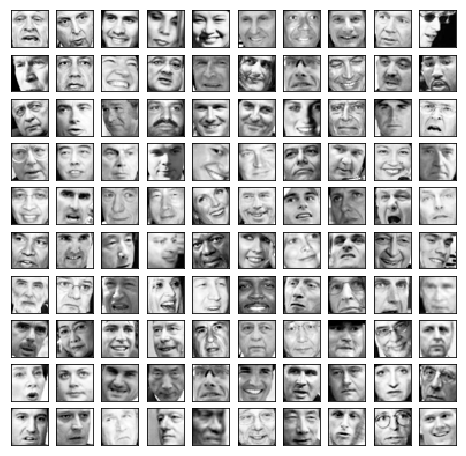

In [2]:
#读取图像
imagine = sio.loadmat('./data/ex7faces.mat')
X = imagine['X']  #(5000,1024)
#显示图像
def plot_imagine(X):
    
    index = np.random.choice(len(X),100)
    imagines = X[index,:]  #(100,1024)
    fig,ax = plt.subplots(10,10,figsize=(8,8),sharex=True,sharey=True)
    for r in range(10):
        for c in range(10):
            ax[r,c].imshow(imagines[10*c+r].reshape((32,32)).T,cmap = 'Greys_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()  
plot_imagine(X)

In [3]:
X1 = X - np.mean(X,axis=0)  #(5000,1024)
sigma = (X1.T @X1)/len(X1)
U,S,V = np.linalg.svd(sigma)
U_reduce = U[:,:36]  #(1024,36)
z = X1 @ U_reduce  #（5000，36）

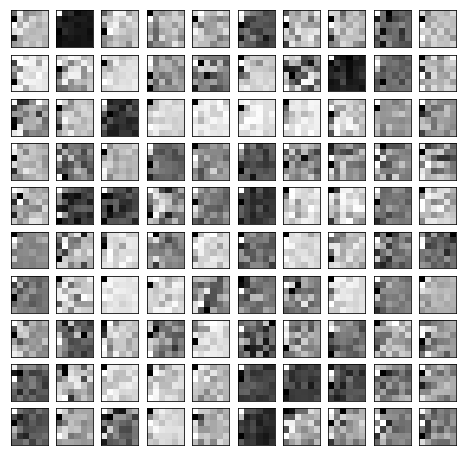

In [4]:
def plot_imagine1(X):
    
    index = np.random.choice(len(X),100)
    imagines = X[index,:]  #(100,1024)
    fig,ax = plt.subplots(10,10,figsize=(8,8),sharex=True,sharey=True)
    for r in range(10):
        for c in range(10):
            ax[r,c].imshow(imagines[10*c+r].reshape((6,6)).T,cmap = 'Greys_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()  
plot_imagine1(z)

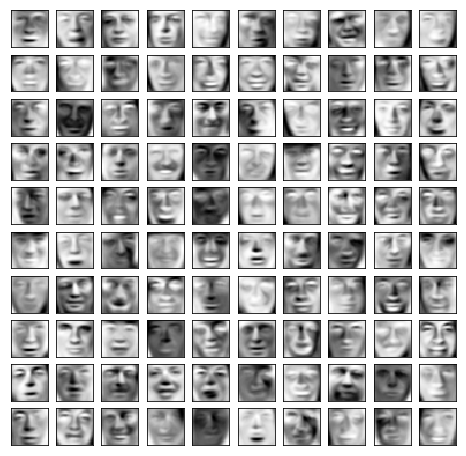

In [5]:
#还原图像
X_appro = z @ U_reduce.T  #(5000,1024)
plot_imagine(X_appro)